# CV Model Comparison Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv("data/runs-12_12_54-06-Dec-24.csv")

In [3]:
cv_runs = [name for name in df.experiment if name.split("_")[-1].split("-")[0] == "fold"]

In [4]:
df_cv = df[df['experiment'].isin(cv_runs)]
df_cv = df_cv[["experiment", 'AUC_val', 'AUC_train', 'training_time_min', 'avg_epoch_time', 'nr_params', 'nr_flops', "best_epoch", "model_config.model"]]
df_cv["model_config.model"] = ["baseline_freq" if "freq" in name else model.strip("\"") for name, model in zip(df_cv["experiment"], df_cv["model_config.model"])]
df_cv = df_cv.rename(columns={'model_config.model': 'model', "avg_epoch_time": "min_per_epoch"})
df_cv = df_cv.drop("experiment", axis=1)
cols_to_convert = [col for col in df_cv.columns if col != 'model']
df_cv[cols_to_convert] = df_cv[cols_to_convert].astype(float)

# custom colnames
df_cv.columns = ["val AUC", "train AUC", "train time (min.)", "min. per epoch", "# parameters", "# flops", "best epoch", "model"]

# add rfr baseline results as separate runs
# {'fit_time': array([6.80966258, 6.84029961, 6.82364678]), 'score_time': array([0.11253095, 0.10652041, 0.10822725]), 'test_roc_auc': array([0.65457794, 0.67147921, 0.65067526]), 'train_roc_auc': array([1., 1., 1.])}

rfr_baseline = pd.DataFrame({
    "val AUC": [0.65457794, 0.67147921, 0.65067526],
    "train AUC": [1] * 3,
    "train time (min.)": [6.80966258 / 60, 6.84029961 / 60, 6.82364678 / 60],
    "min. per epoch": [np.nan] * 3,
    "# parameters": [np.nan] * 3,
    "# flops": [np.nan] * 3,
    "best epoch": [np.nan] * 3,
    "model": ["RFR (freq)"] * 3
})

df_cv = pd.concat([df_cv, rfr_baseline], axis=0)
df_cv.reset_index(drop=True, inplace=True)

In [5]:
df_cv

,val AUC,train AUC,train time (min.),min. per epoch,# parameters,# flops,best epoch,model
0,0.686842,0.717357,0.791600,0.041663,111537.0,2.987200e+04,19.0,cnn
1,0.671957,0.709664,0.704400,0.041435,111537.0,2.987200e+04,17.0,cnn
2,0.679309,0.699522,0.526700,0.043892,111537.0,2.987200e+04,12.0,cnn
3,0.670848,0.706491,100.546200,1.256827,90177.0,3.392571e+09,80.0,xlstm
4,0.667375,0.700793,69.144500,1.257173,90177.0,3.392571e+09,55.0,xlstm
5,0.671961,0.711000,106.297400,1.250558,90177.0,3.392571e+09,85.0,xlstm
6,0.688057,0.698178,16.294800,0.319506,3364685.0,1.368158e+08,51.0,LEGnet
7,0.671378,0.693529,11.554500,0.296269,610305.0,1.614129e+09,39.0,transformer
8,0.681323,0.705754,11.842400,0.320065,3364685.0,1.368158e+08,37.0,LEGnet
9,0.671453,0.691188,6.773000,0.294478,610305.0,1.614129e+09,23.0,transformer


In [6]:
df_grouped = df_cv.groupby("model").mean()
df_grouped

,val AUC,train AUC,train time (min.),min. per epoch,# parameters,# flops,best epoch
model,,,,,,,
LEGnet,0.687012,0.701465,16.286367,0.317846,3364685.0,1.368158e+08,51.333333
RFR (freq),0.658911,1.000000,0.113742,NaN,NaN,NaN,NaN
baseline,0.646748,0.736308,0.620967,0.132833,44276097.0,4.426970e+07,4.666667
baseline_freq,0.711592,0.737739,5.355800,0.046942,42449.0,4.147200e+04,114.000000
cnn,0.679369,0.708848,0.674233,0.042330,111537.0,2.987200e+04,16.000000
gru,0.673896,0.695386,19.812933,0.479745,11298817.0,7.072000e+04,41.333333
lstm,0.657772,0.680054,14.444100,0.292755,616961.0,1.772800e+04,49.333333
mamba,0.674482,0.702913,0.566833,0.020081,6017.0,2.765968e+06,28.333333
transformer,0.673285,0.693811,8.726300,0.293847,610305.0,1.614129e+09,29.666667


In [7]:
df_grouped_std = df_cv.groupby("model").std()
df_grouped_std.columns = [f"{col} std" for col in df_grouped_std.columns]
df_grouped_std

,val AUC std,train AUC std,train time (min.) std,min. per epoch std,# parameters std,# flops std,best epoch std
model,,,,,,,
LEGnet,0.005245,0.003887,4.439756,0.003370,0.0,0.0,14.502873
RFR (freq),0.011058,0.000000,0.000256,NaN,NaN,NaN,NaN
baseline,0.002872,0.040127,0.089899,0.003939,0.0,0.0,0.577350
baseline_freq,0.011200,0.039538,3.678485,0.001979,0.0,0.0,76.334789
cnn,0.007442,0.008945,0.135002,0.001357,0.0,0.0,3.605551
gru,0.004853,0.010876,6.105700,0.013520,0.0,0.0,13.051181
lstm,0.002598,0.008565,1.257855,0.005852,0.0,0.0,4.041452
mamba,0.004990,0.016070,0.231933,0.000648,0.0,0.0,12.096832
transformer,0.003239,0.002774,2.507942,0.002792,0.0,0.0,8.326664


In [8]:
# add all information
df_grouped = pd.concat([df_grouped, df_grouped_std], axis=1)

# change model names
df_grouped = df_grouped.rename(index={
    "baseline": "Baseline",
    "baseline_freq": "Baseline (freq)",
    "cnn": "CNN",
    "gru": "GRU",
    "lstm": "LSTM",
    "mamba": "Mamba",
    "transformer": "Transformer",
    "xlstm": "xLSTM",
    "LEGnet": "LEGnet",
    "RFR (freq)": "RFR (freq)"
})

## Results barplots

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

def plot_variable(df_plot, var, x_min=0, log_scale=False, use_sem=False, use_ci=False):
    # Sort dataframe by the variable to plot
    df_plot = df_plot.sort_values(var)
    df_plot.sort_values(by=var, inplace=True)
    
    # Compute uncertainty (SEM or SD)
    if use_ci:
        N = 3  # Number of CV runs
        df = N - 1  # Degrees of freedom
        t_critical = t.ppf(0.975, df)  # t-value for 95% confidence interval
        uncertainty = df_plot[f"{var} std"] / np.sqrt(N) * t_critical
    elif use_sem:
        uncertainty = df_plot[f"{var} std"] / np.sqrt(3)
    else:
        uncertainty = df_plot[f"{var} std"]
    
    # Plot the data with error bars
    plt.figure(figsize=(10, 5))
    if use_ci or use_sem:
        #plt.errorbar(df_plot[var], df_plot.index, xerr=uncertainty, fmt='o', color='skyblue', ecolor='lightgray', elinewidth=2, capsize=0)
        plt.barh(df_plot.index, df_plot[var], xerr=uncertainty, color='skyblue', capsize=2, ecolor="gray")
        plt.title(f"Mean {var} \n (with uncertainty over 3 folds)")
    else:
        plt.barh(df_plot.index, df_plot[var], xerr=uncertainty, color='skyblue')
        plt.title(f"Mean {var} \n (over 3 folds)")
    plt.xlabel(var)
    
    # Set x-axis limits and scaling
    if x_min:
        plt.xlim(x_min, df_plot[var].max() * 1.03)
    if log_scale:
        plt.xscale('log')
    
    # Display the plot
    plt.show()

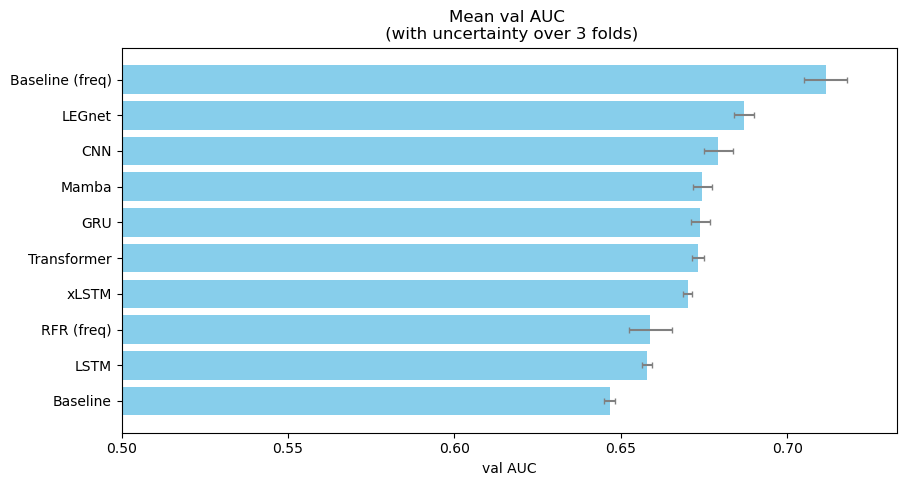

In [10]:
plot_variable(df_grouped.copy(), "val AUC", x_min=0.5, use_sem=True)

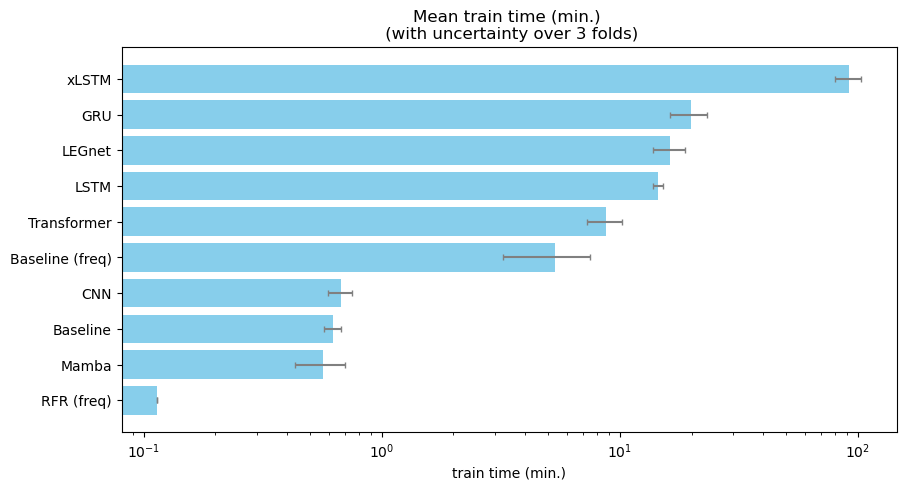

In [11]:
plot_variable(df_grouped.copy(), "train time (min.)", log_scale=True, use_sem=True)

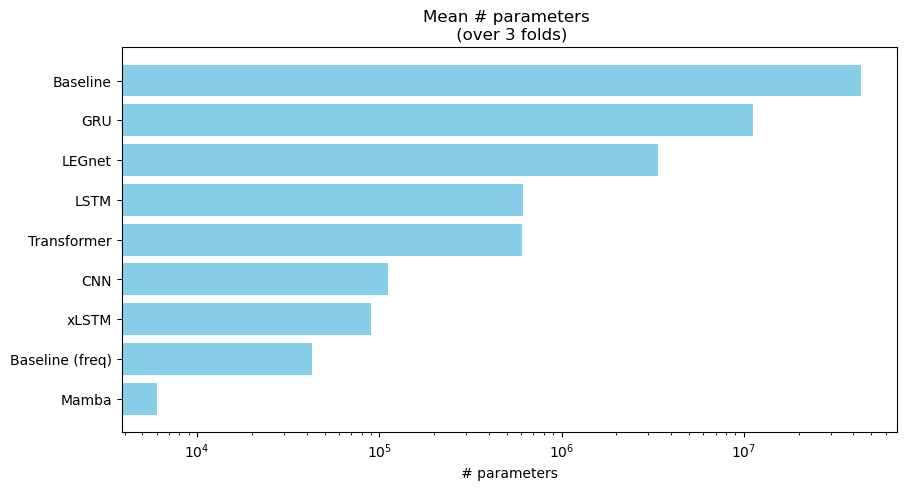

In [12]:
plot_variable(df_grouped.copy(), "# parameters", log_scale=True)

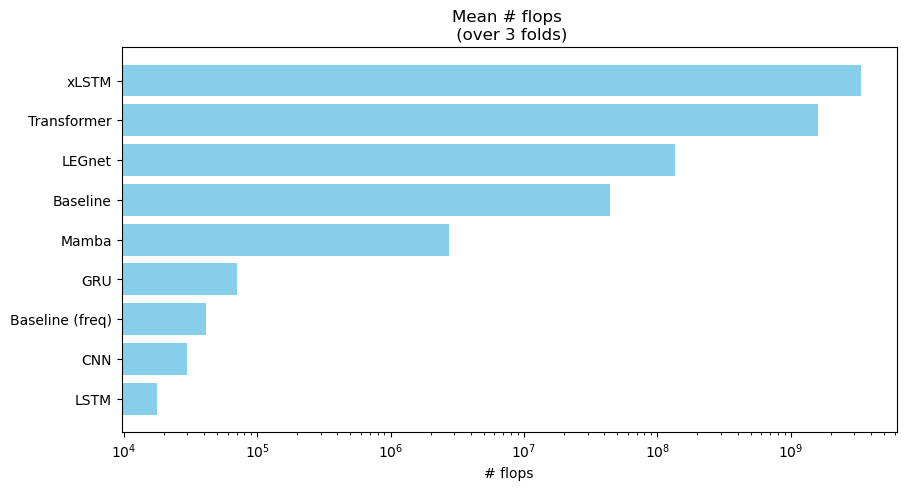

In [13]:
plot_variable(df_grouped.copy(), "# flops", log_scale=True)

## Results Table

In [14]:
df_table = df_grouped.copy()
df_table.sort_values(by="val AUC", ascending=False, inplace=True)
df_table.reset_index(inplace=True)
#df_table.drop(["avg_epoch_time"], axis=1, inplace=True)
df_table[["# parameters", "# flops"]] = df_table[["# parameters", "# flops"]].astype(pd.Int64Dtype())

In [15]:
df_table

,model,val AUC,train AUC,train time (min.),min. per epoch,# parameters,# flops,best epoch,val AUC std,train AUC std,train time (min.) std,min. per epoch std,# parameters std,# flops std,best epoch std
0,Baseline (freq),0.711592,0.737739,5.355800,0.046942,42449,41472,114.000000,0.011200,0.039538,3.678485,0.001979,0.0,0.0,76.334789
1,LEGnet,0.687012,0.701465,16.286367,0.317846,3364685,136815770,51.333333,0.005245,0.003887,4.439756,0.003370,0.0,0.0,14.502873
2,CNN,0.679369,0.708848,0.674233,0.042330,111537,29872,16.000000,0.007442,0.008945,0.135002,0.001357,0.0,0.0,3.605551
3,Mamba,0.674482,0.702913,0.566833,0.020081,6017,2765968,28.333333,0.004990,0.016070,0.231933,0.000648,0.0,0.0,12.096832
4,GRU,0.673896,0.695386,19.812933,0.479745,11298817,70720,41.333333,0.004853,0.010876,6.105700,0.013520,0.0,0.0,13.051181
5,Transformer,0.673285,0.693811,8.726300,0.293847,610305,1614129280,29.666667,0.003239,0.002774,2.507942,0.002792,0.0,0.0,8.326664
6,xLSTM,0.670062,0.706095,91.996033,1.254853,90177,3392570704,73.333333,0.002392,0.005115,19.997838,0.003724,0.0,0.0,16.072751
7,RFR (freq),0.658911,1.000000,0.113742,NaN,<NA>,<NA>,NaN,0.011058,0.000000,0.000256,NaN,NaN,NaN,NaN
8,LSTM,0.657772,0.680054,14.444100,0.292755,616961,17728,49.333333,0.002598,0.008565,1.257855,0.005852,0.0,0.0,4.041452
9,Baseline,0.646748,0.736308,0.620967,0.132833,44276097,44269696,4.666667,0.002872,0.040127,0.089899,0.003939,0.0,0.0,0.577350


In [16]:
df_table = df_table[['model', 'val AUC', 'train AUC', 'train time (min.)',
                     '# parameters', '# flops', 'min. per epoch', 'best epoch']]

In [17]:
def transparent_nan(val):
    if pd.isnull(val) or val is pd.NA:
        return 'background-color: white; color: white;'
    return ''

styled_df = (
    df_table.style
    .background_gradient(subset=['val AUC'], cmap='Greens')  # Color scale for 'val AUC'
    .background_gradient(subset=['train time (min.)'], cmap='Reds')  # Color scale for 'train time'
    .background_gradient(subset=['# parameters'], cmap='Reds')  # Color scale for '# Parameters'
    .background_gradient(subset=['# flops'], cmap='Reds')  # Color scale for '# Parameters'
    .background_gradient(subset=['min. per epoch'], cmap='Reds')  # Color scale for '# Parameters'
    .background_gradient(subset=['best epoch'], cmap='Reds')  # Color scale for '# Parameters'
    .map(transparent_nan)
    .format(precision=4)
)

styled_df

,model,val AUC,train AUC,train time (min.),# parameters,# flops,min. per epoch,best epoch
0,Baseline (freq),0.7116,0.7377,5.3558,42449,41472,0.0469,114.0000
1,LEGnet,0.6870,0.7015,16.2864,3364685,136815770,0.3178,51.3333
2,CNN,0.6794,0.7088,0.6742,111537,29872,0.0423,16.0000
3,Mamba,0.6745,0.7029,0.5668,6017,2765968,0.0201,28.3333
4,GRU,0.6739,0.6954,19.8129,11298817,70720,0.4797,41.3333
5,Transformer,0.6733,0.6938,8.7263,610305,1614129280,0.2938,29.6667
6,xLSTM,0.6701,0.7061,91.9960,90177,3392570704,1.2549,73.3333
7,RFR (freq),0.6589,1.0000,0.1137,,,nan,nan
8,LSTM,0.6578,0.6801,14.4441,616961,17728,0.2928,49.3333
9,Baseline,0.6467,0.7363,0.6210,44276097,44269696,0.1328,4.6667
